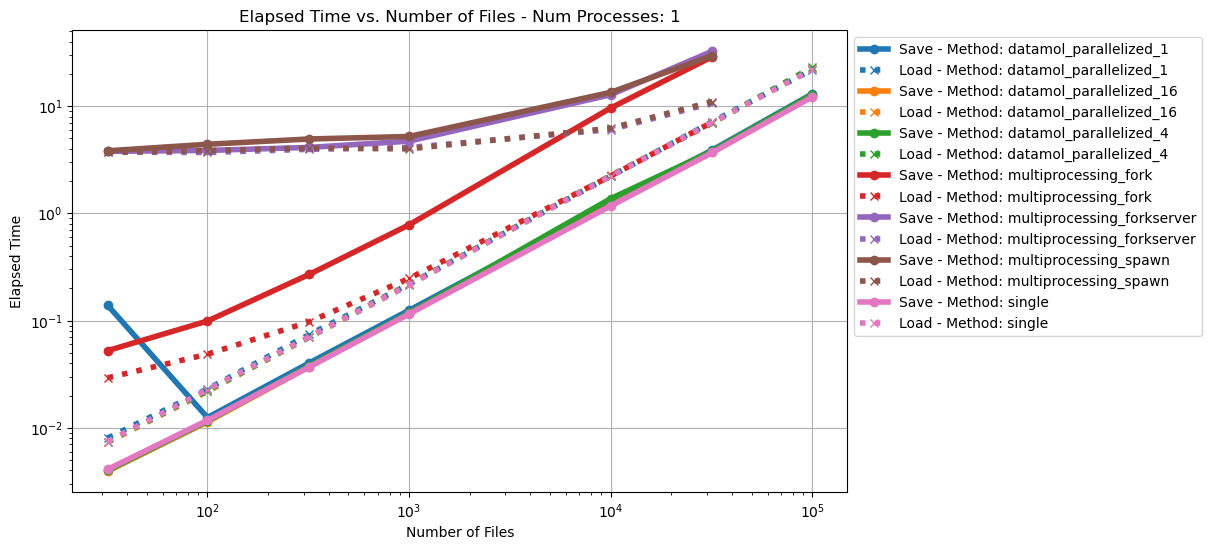

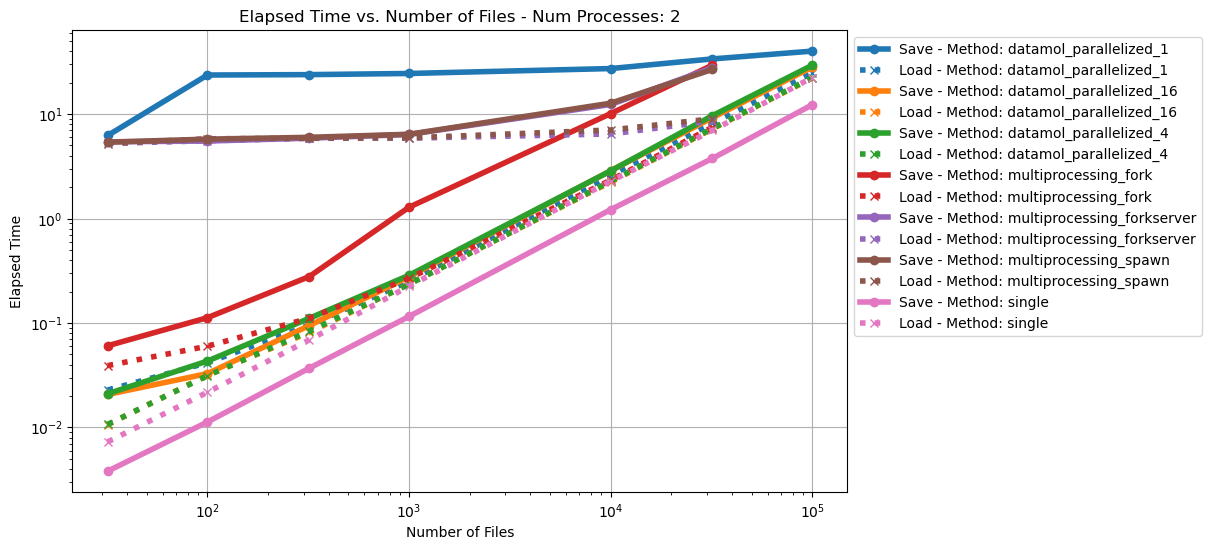

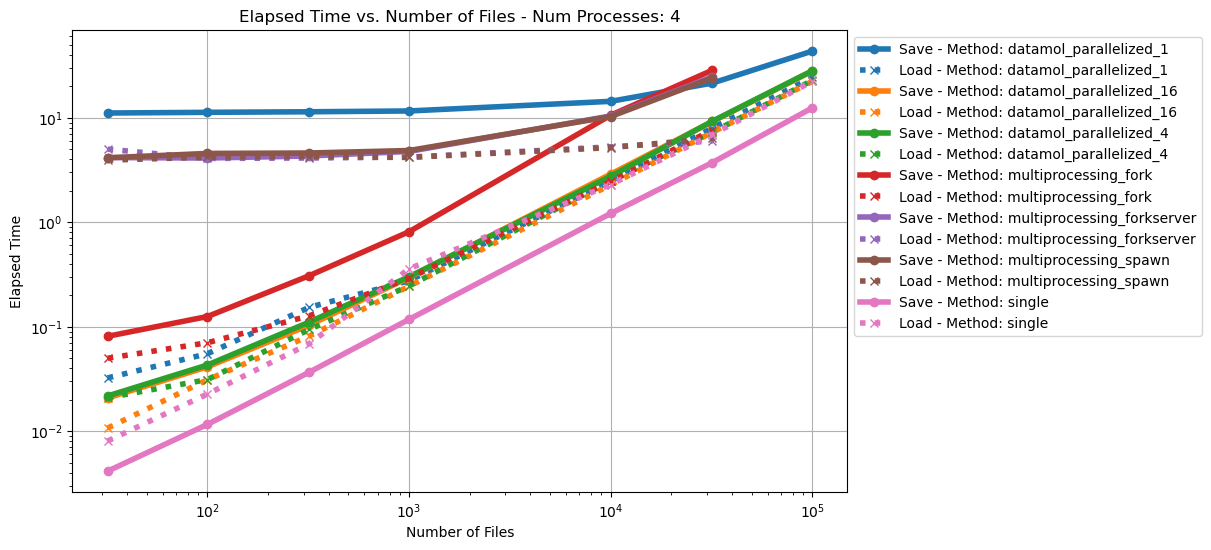

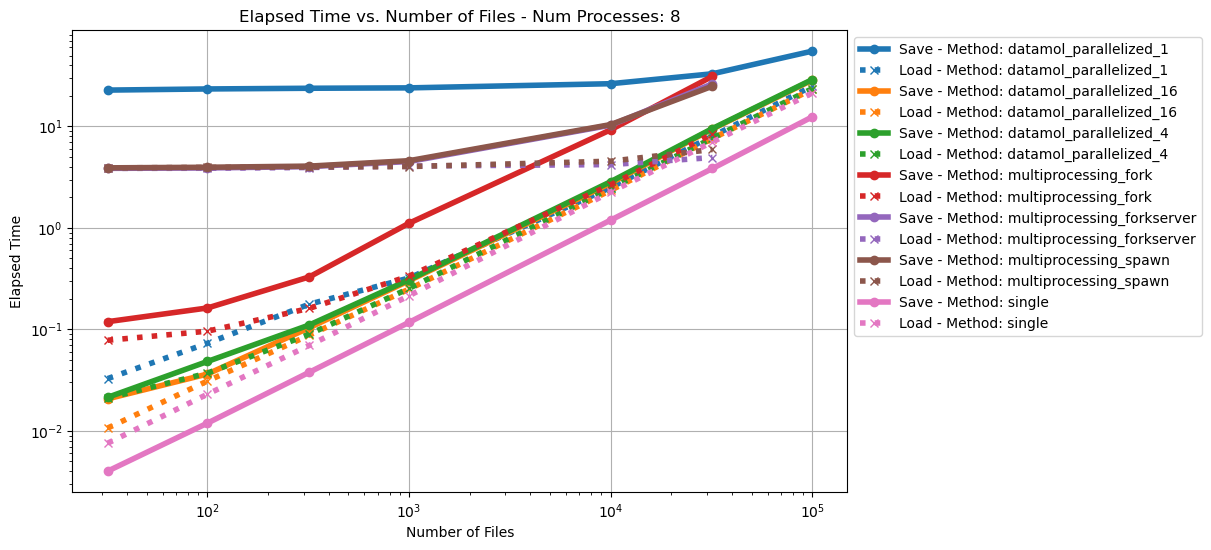

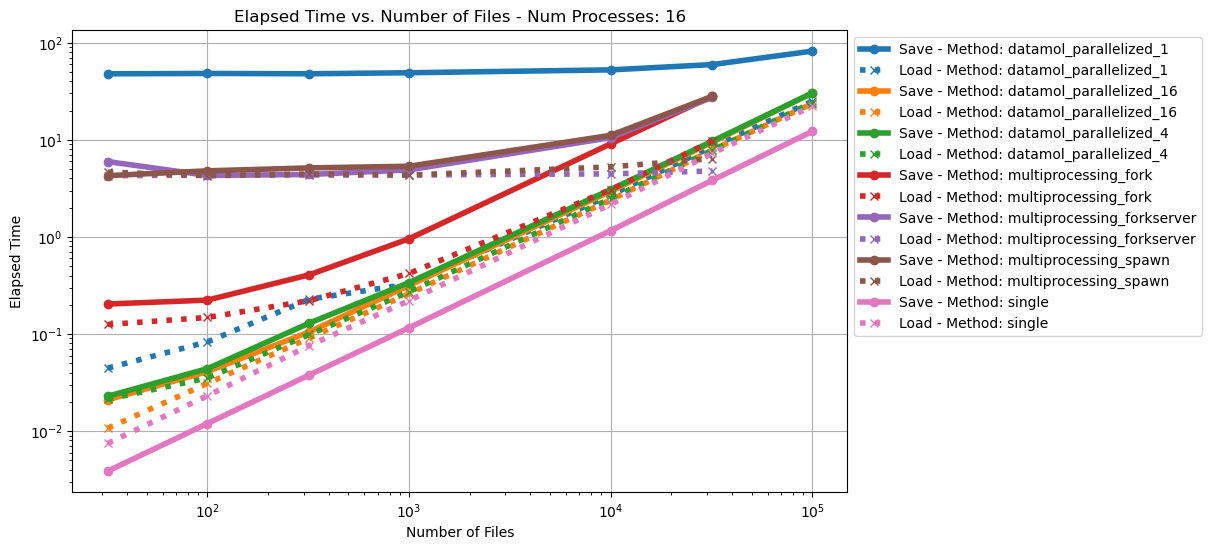

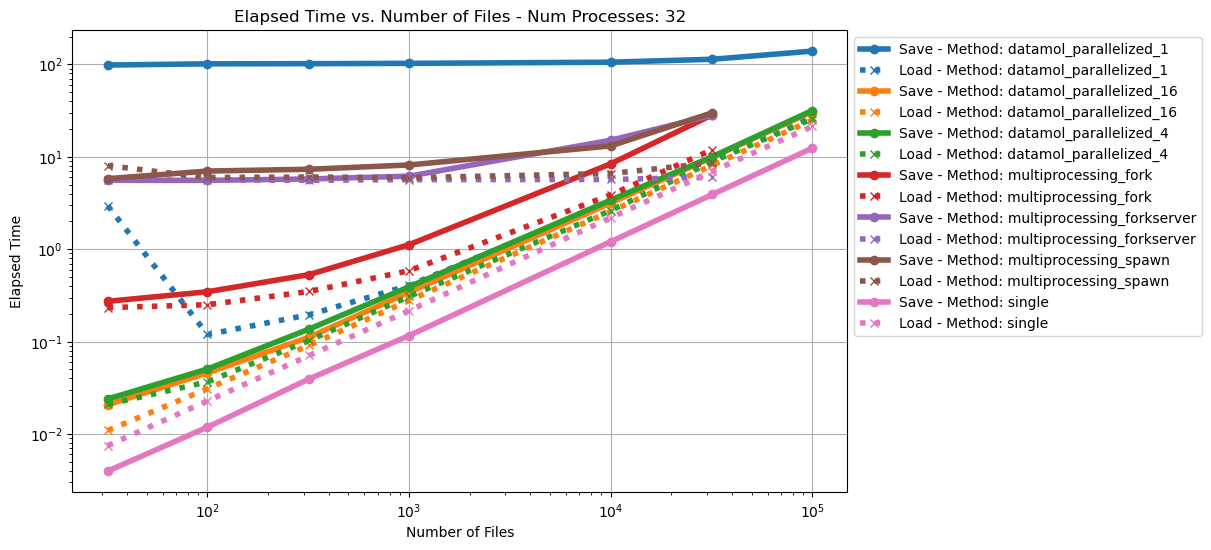

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import cycler


# Read CSV
# To generate this CSV, run the file `profiling/profile_pickle_saving_reading.py`
data = pd.read_csv('profiling/benchmark_save_load.csv')

# Group by num_processes
num_process_groups = data.groupby('num_processes')

# Define a color cycle
colorblind_friendly_colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    # "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow
    "#17becf"   # cyan
]
custom_color_cycle = cycler.cycler(color=colorblind_friendly_colors)
plt.rcParams["axes.prop_cycle"] = custom_color_cycle

# Loop through num_processes groups
for num_processes, num_process_group in num_process_groups:
    plt.figure(figsize=(10, 6))
    
    # Group by method within num_processes group
    method_groups = num_process_group.groupby('method')
    
    # Create an iterator for the color cycle
    color_iterator = iter(color_cycle)
    
    for method, method_group in method_groups:
        label = f'Method: {method}'
        color = next(color_iterator)  # Get the next color
        
        plt.loglog(method_group['num_files'], method_group['save_elapsed_time'], label=f'Save - {label}', color=color, marker='o', linewidth=4)
        plt.loglog(method_group['num_files'], method_group['load_elapsed_time'], linestyle='dotted', label=f'Load - {label}', color=color, marker='x', linewidth=4)

    plt.xlabel('Number of Files')
    plt.ylabel('Elapsed Time')
    plt.title(f'Elapsed Time vs. Number of Files - Num Processes: {num_processes}')
    
    # Place the legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True)
    plt.show()
